# Assignment High Frequency Words

### Goal

1. Choose a corpus of interest.
2. How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law?  Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

**Load Packages**

The necessary packages are loaded including the nltk books available.

In [1]:
import nltk
#nltk.download()
from nltk.book import *
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


**Loading the Corpus**

The different corpus available in the nltk package are displayed below.

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

I chose the Shakespeare-Caesar Corpus from  nltk. It is available as a .txt file.

I use the gutenberg.words() find the number of words present in this corpus and it is assigned to *caesar_words*.

There are 25833 words present in this corpus.

In [3]:
caesar_words=nltk.corpus.gutenberg.words('shakespeare-caesar.txt')
len(caesar_words)

25833

**Unique Words in Corpus**

The task here is to find the unique words in this corpus so I load the stopwords available into *stopwords*.

Using *stopwords* I have displayed below the unique word count with and without stopwords.

In [4]:
stopwords = nltk.corpus.stopwords.words('english')
content_with=[w.lower() for w in caesar_words if re.search("\w", w)] #with stopwords
content = [w for w in content_with if w.lower() not in stopwords] #without stopwords


In [5]:
content_fdist=nltk.FreqDist(content)
content_with_fdist=nltk.FreqDist(content_with)

In [6]:
len(content_fdist)

2916

In [7]:
len(content_with_fdist)

3019

From this we can see that without stopwords there are 2916 unique words and with stopwords there are 3019 unique words when the total number of words in the corpus is 25833

**Common words taking up half the corpus**

From here on I will be using the case with stopwords.

For finding the common words that makes up half of the corpus I created a pandas dataframe with the common words and their count. 

I have added an additional cummsum column having the cummulative sum to find the common words.

In [11]:
df = pd.DataFrame(content_with_fdist.most_common(),columns=['word','count'])
df['cummsum'] = df['count'].cumsum() #cumulative sum of the words based on their frequency
df.head()

,word,count,cummsum
0,and,627,627
1,the,579,1206
2,i,533,1739
3,to,446,2185
4,you,391,2576


*common* dataframe consists of the most common words

In [12]:
common=df[df.cummsum < (len(content_with)/2)]
common

,word,count,cummsum
0,and,627,627
1,the,579,1206
2,i,533,1739
3,to,446,2185
4,you,391,2576
...,...,...,...
61,them,60,10195
62,heere,59,10254
63,man,59,10313
64,at,59,10372


The number of common words making up half of the corpus is 66.

**200 most Frequency Words**

*df200* has the first 200 common words.

In [13]:
df200 = content_with_fdist.most_common(200)
#np.set_printoptions(threshold=np.inf)
df200

[('and', 627),
 ('the', 579),
 ('i', 533),
 ('to', 446),
 ('you', 391),
 ('of', 354),
 ('that', 289),
 ('a', 267),
 ('not', 257),
 ('is', 253),
 ('in', 225),
 ('d', 215),
 ('my', 209),
 ('it', 198),
 ('caesar', 190),
 ('me', 188),
 ('he', 177),
 ('for', 176),
 ('this', 166),
 ('him', 166),
 ('will', 163),
 ('brutus', 161),
 ('his', 157),
 ('bru', 153),
 ('with', 150),
 ('your', 149),
 ('haue', 148),
 ('be', 147),
 ('but', 141),
 ('so', 139),
 ('as', 133),
 ('what', 129),
 ('shall', 125),
 ('do', 122),
 ('thou', 115),
 ('are', 109),
 ('all', 109),
 ('then', 107),
 ('cassi', 107),
 ('by', 100),
 ('we', 95),
 ('no', 93),
 ('our', 93),
 ('cassius', 85),
 ('if', 84),
 ('on', 82),
 ('did', 82),
 ('antony', 75),
 ('come', 74),
 ('o', 71),
 ('good', 71),
 ('let', 71),
 ('know', 70),
 ('men', 69),
 ('when', 67),
 ('was', 67),
 ('they', 65),
 ('enter', 64),
 ('now', 63),
 ('vs', 63),
 ('their', 61),
 ('them', 60),
 ('heere', 59),
 ('man', 59),
 ('at', 59),
 ('am', 57),
 ('thy', 56),
 ('thee', 55

**Graph that shows the relative frequency of 200 words**

The below graph is plotted using seaborn barplot but with 200 words the x axis gets cramped up so i have displayed 90 most common words as well.

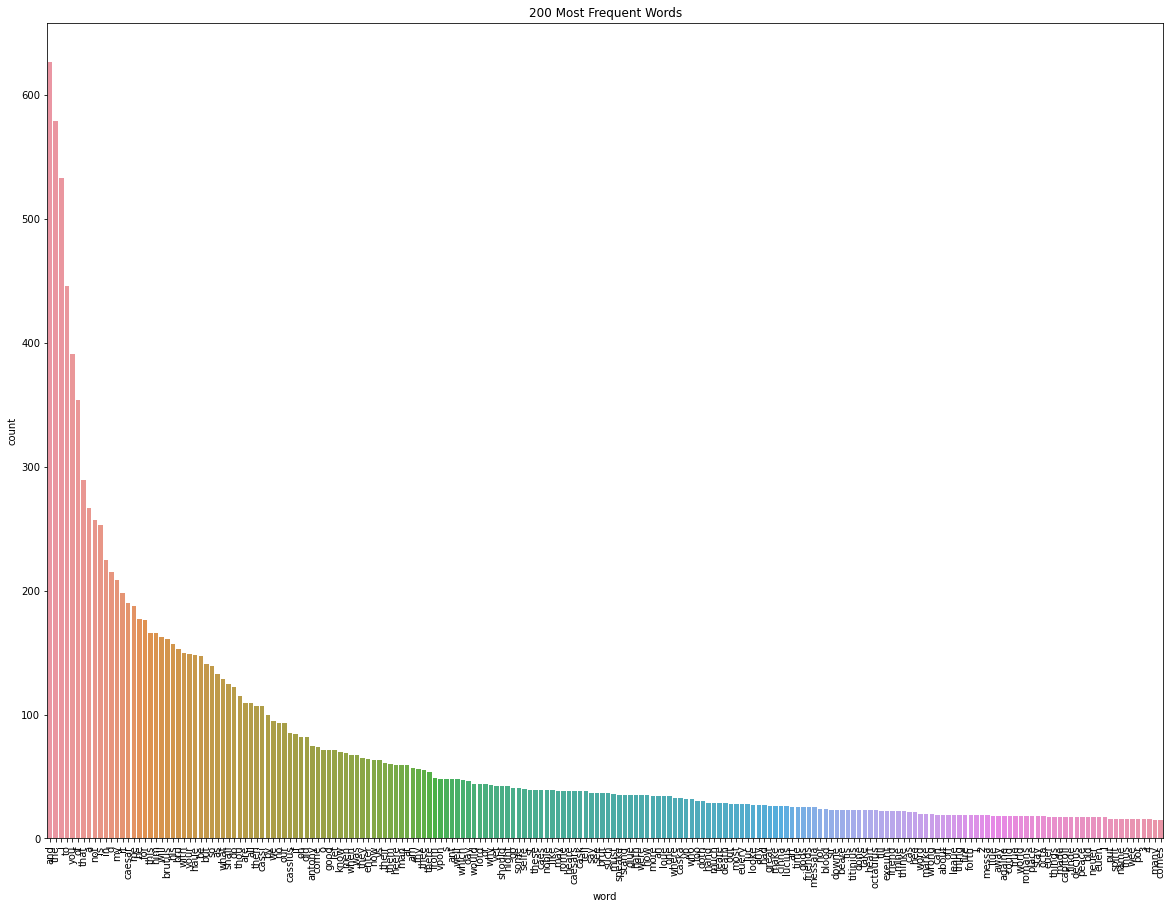

In [14]:
df200_G=pd.DataFrame(df200,columns=['word','count'])
plt.figure(figsize=(20,15))
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("200 Most Frequent Words")
plt.xticks(rotation=90)

sns.barplot(x="word", y="count", data=df200_G)
plt.show()

**Graph that shows the relative frequency of 90 words**

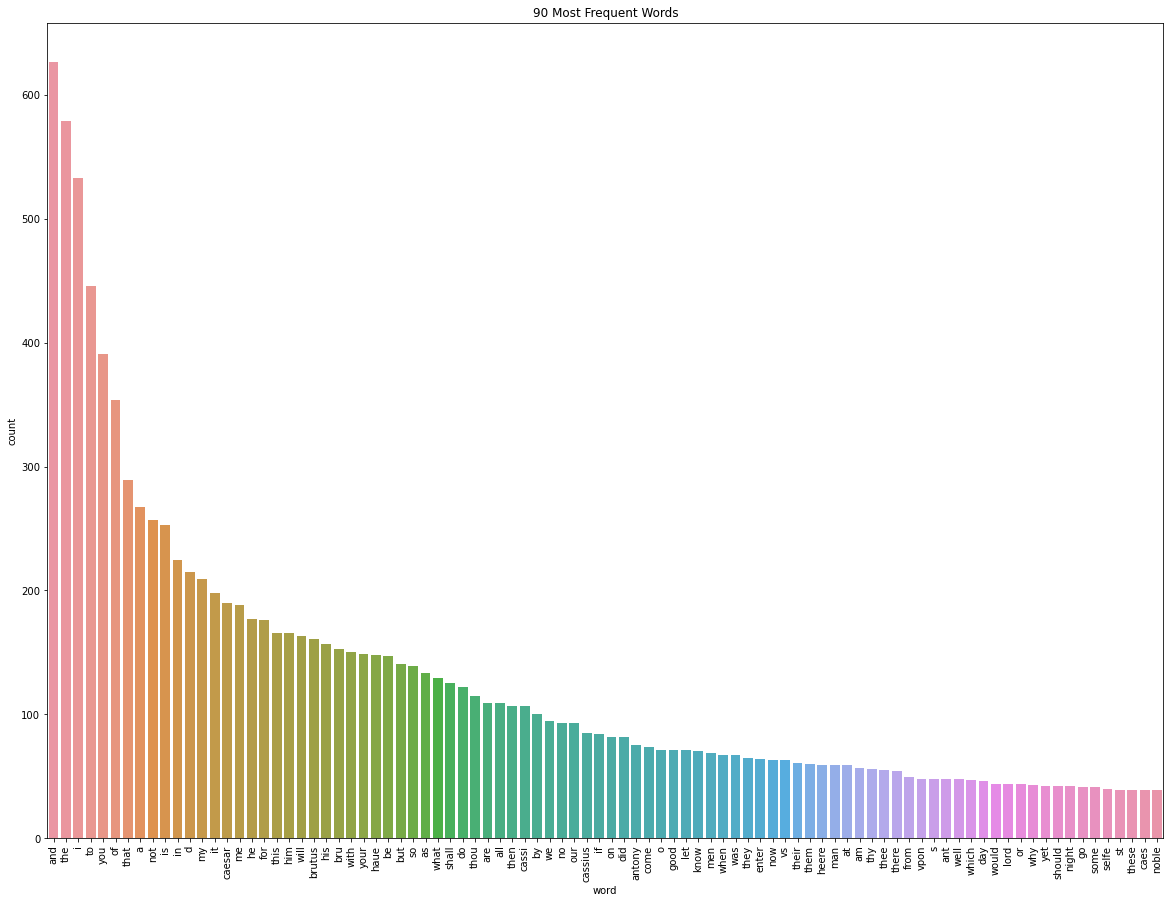

In [15]:
plt.figure(figsize=(20,15))
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("90 Most Frequent Words")
plt.xticks(rotation=90)

sns.barplot(x="word", y="count", data=df200_G[:90])
plt.show()

**Does the observed relative frequency of these words follow Zipf’s law?  Explain.**

(-0.5, 842.5, 183.5, -0.5)

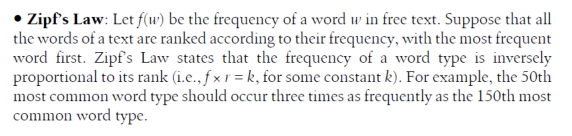

In [16]:
plt.figure(figsize=(10,10))
pic=plt.imread('Zipfs.png')
plt.imshow(pic)
plt.axis('off')

From the above graphs it is clear that in the **Shakespeare Caesar Corpus** the most common word is 'and' followed by 'the'. It is clear that the word with the most frequency has rank 1. Higher the frequency, lower the rank. Therefore, the observed relative frequency of these words follow Zipf’s law.


**In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”**

The inverse relationship of Zipf's law is present in this corpus but the relative frequency varies from the ideal case. The corpus I used was a book so I am guessing that this deviation in the relative frequency could be becase of that as a book focus on a particular idea alone.

**Video**

https://youtu.be/fBt2S8zR9Y8 